# MU4MEN01 - Introduction à l'optimisation

## Auteurs: Yousri Aboudaoud & Leo Bellali & Sofiane Ouali
### M1 ISI Groupe 1 
N° Etudiant : 28712992 & 28609955 & 3802574

# Le problème

 L'objctif de ce présent projet est mettre en oeuvre des méthodes d'optimisation de calcul afin de réduire le résidu R(θ) résultant d'une imprécision liée au modèle géométrique inverse d'un bras robot à 2 articulations.

<img src="Bras Robotique à deux articulations.png">

# Le code
Le code est composè de deux classes TwoArmedRobotSystem qui défini les paramètres du problème et ainsi de suite la fonction coût ainsi que d'autres méthodes utilisées pour le calcul du minium par le biais de la classe MinimaToolBox (Cf. Diagramme UML ci-après)


<img src="2DofRobotOptimizationUML.png">

### Première méthode Root

  Le modèle géométrique est régit par le système (I)

\begin{cases}
l_1*cos(θ_1) + l_2 * cos(θ_1+θ_2) = p_x\\
l_1*sin(θ_1) + l_2 * sin(θ_1+θ_2) = p_y
\end{cases}

 Le résidu est une fonction à deux varibales d'entrées ($θ_1$ et $θ_2$) et deux sorties (II)

\begin{cases}
l_1*cos(θ_1) + l_2 * cos(θ_1+θ_2) - p_x = 0\\
l_1*sin(θ_1) + l_2 * sin(θ_1+θ_2) - p_y = 0
\end{cases}

   Notre objectif est de mettre en oeuvre les méthodes d'optimisation afin de trouver en premier lieu les solutions du système (II) (i.e. des valeurs de $θ_1$ et $θ_2$ tel que (II) soit résolu). Nous définissons notre système le fichier "Système.py" où nous utilisons la méthodes $root$ de scipy.

In [1]:
from MinimaToolBox import *
from TwoArmedRobotSystem import *

In [2]:
#Définition du système 
MySystem=TwoArmedRobotSystem(.5,.5)


In [3]:

# Trajectoire voulue (NB: Dans le prèsent notebook les explications
# seront faites avec une trajectoire allant de (.75,.25) jusqu'à (.25,.75)
# avec un nombre d'échantillons égal à 5)
MySystem.computeTrajectory()

Greetings ! 
Please enter the value x coordinate of the starting point
.75
Please enter the value y coordinate of the starting point
.25
Please enter the value x coordinate of the ending point
.25
Please enter the value y coordinate of the ending point
.75
thank you
please enter the number of samples
5
gratitude


###  La pose x non atteignable est donnée par l'équation 

$(l_1 − l_2)^2 ≤ p_x^2 + p_y^2 ≤ (l_1 + l_2)^2$

In [4]:
MySystem.computeReachableRegion()

(0.0, 1.0)

In [5]:
MyToolBox=MinimaToolBox(MySystem,1e-3)


In [6]:
thet1Root,thet2Root=MyToolBox.getMinimaViaRoot()

MySystem.SolutionsVisualisation(thet1Root,thet2Root)

interactive(children=(IntSlider(value=0, description='k', max=5), Output()), _dom_classes=('widget-interact',)…

### Deuxième méthode Root

 D'autre part, nous utilisons la méthode optimize de scipy pour trouver le minimum de la fonction coût, qui dans notre cas est défini comme la norme au carré du résidu ( c.f. système II ) ce qui donne l'équiation suivante

$(1) => ||R(θ)||² = (l_1 * cos(θ_1) + l_2 * cos (θ_1 + θ_2) - px)² + (l_1 * sin(θ_1) + l_2 * sin (θ_1 + θ_2) - py)²  $

In [7]:
thet1Min,thet2Min=MyToolBox.getMinimaViaMinimize()
MySystem.SolutionsVisualisation(thet1Min,thet2Min)

interactive(children=(IntSlider(value=0, description='k', max=5), Output()), _dom_classes=('widget-interact',)…

### Troisième méthode Newton

#### Pour mettre en application la méthode de Newton, il nous faut résoudre $H[J(X_n)] * ΔX = - ∇[J(X_n)]$.

#### Dans notre cas $X_n$ correspond θ et J correspond R, on obtient donc :

\begin{gather}
 \begin{bmatrix} H_{11} & H_{12} \\ H_{21} & H_{22} \end{bmatrix} 
 *
 \begin{bmatrix} Δθ_1\\ Δθ_2 \end{bmatrix} 
 = - 
 \begin{bmatrix} g_1\\ g_2 \end{bmatrix}
\end{gather}

#### Ce qui renvoie le système (III) suivant :

\begin{cases}
H_{11} * Δθ_1 + H_{12} * Δθ_2 + g_1 = 0\\
H_{21} * Δθ_1 + H_{22} * Δθ_2 + g_1 = 0
\end{cases}

#### Ici l'inconnue est $Δθ$ = ($Δθ_1$ + $Δθ_2$), de ce fait, nous utilisons la méthode root sur le système pour le résoudre.

#### Les matrices Jacobienne et Hessienne sont écrites de cette façon :

$∇(||R(θ)||²)$ =
\begin{bmatrix}
2(-l_1sinθ_1-l_2sin(θ_1+θ_2))(l_1cosθ_1+l_2cos(θ_1+θ_2)-p_x)+2(l_1cosθ_1+l_2cos(θ_1+θ_2)-p_y)\\
2l_2(-sin(θ_1+θ_2)(l_1*cosθ_1+l_2cos(θ_1+θ_2)-p_x)+cos(θ_1+θ_2)(l_1sinθ_1+l_2sin(θ_1+θ_2)-p_y))
\end{bmatrix}

$H(||R(θ)||²)$ =
\begin{bmatrix}
2 p_x (l_1 cosθ_1 + l_2cos(θ_1 + θ_2))\\
2 p_y (l_1 sinθ_1 + l_2 sin (θ_1 + θ_2))\\
-cos(θ_1 + θ_2)(l_1 cosθ_1 + l_2 cos(θ_1 + θ_2)-p_x)\\
-sin(θ_1 + θ_2)(l_1 sinθ_1 + l_2 sin(θ_1 + θ_2) - p_y)+ 2 l_2\\
2 p_x l_2 sin(θ_1 + θ_2) + 2 p_y l_2 cos(θ_1 + θ_2)\\
2 l_2 (cos(θ_1 + θ_2) p_x + sin(θ_1 + θ_2) p_y)
\end{bmatrix}

In [8]:
maxIter = 100
initialValueArray = [2, 4]
alpha=1
accuracy=MyToolBox.accuracy
arraythetaNewton=MyToolBox.getMinimaViaNewtonForMultipleValues(initialValueArray, accuracy, maxIter)
MySystem.SolutionsVisualisation(arraythetaNewton[0],arraythetaNewton[1])

interactive(children=(IntSlider(value=0, description='k', max=5), Output()), _dom_classes=('widget-interact',)…

### Quatrième méthode, le gradient à pas fixe 

In [9]:
arraythetaGrad=MyToolBox.getMinimaViaFixedStepGradForMultipleValues(initialValueArray, accuracy, maxIter,alpha)
MySystem.SolutionsVisualisation(arraythetaGrad[0],arraythetaGrad[1])

interactive(children=(IntSlider(value=0, description='k', max=5), Output()), _dom_classes=('widget-interact',)…

### Iso-Valeurs

0.9832648205339537
4.960734644959185


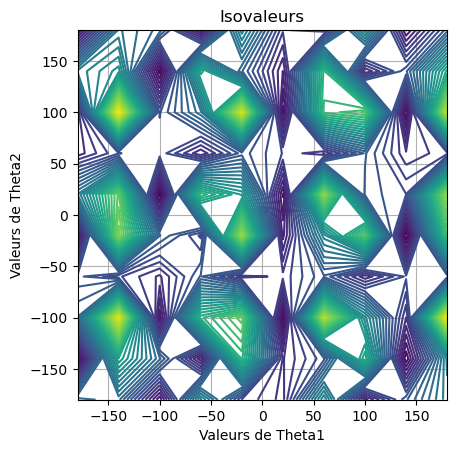

In [22]:
theDesiredPointIndex=0
theta1Min,theta2Min=arraythetaGrad[0][theDesiredPointIndex],arraythetaGrad[1][theDesiredPointIndex]

nIso=46
MySystem.DisplayIsoValues(theDesiredPointIndex,theta1Min,theta2Min,nIso)

### Conclusion 
#### Existence de solutions non uniques 
  Ce point est illustré par le fait qu'il y'a divers solutions qui peuvent être observées par les résultats des méthodes de newton
#### Existence de problèmes sans solution
  Ce point est illustré par le choix de points appartenant à la zone non atteignable 

#### Importance du pas de la méthode du gradient
  Pour des valeurs de Alpha supèrieures à 1.5 et inférieures à .5 le système diverge

#### Importance du point de départ de la méthode de Newton
   Pour certaines valeurs du point du départ, le robot diverge et se retrouve dans des configurations impossible physiquement
  